# `Machine Learning ZoomCamp`
## `HW1_Chapter 4: Evaluation`

### Aileah Gotladera
-----------------------------------

In [94]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [51]:
# Load the data
file = 'C:/Users/LXPH/OneDrive - Lexcode/Documents/ML ZoomCamp/Data/Homework/ch4_Evaluation_hwdata.csv'
data = pd.read_csv(file)
print(data.shape)
data.head()

(11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [52]:
data_filtered = data[['Make', 'Model', 'Year','Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
       'highway MPG', 'city mpg', 'MSRP']]

In [53]:
# Cleaning column names
data_filtered.columns = data_filtered.columns.str.lower().str.replace(' ', '_')
data_filtered.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [54]:
data_filtered.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [56]:
data_filtered.fillna(0, inplace=True)
data_filtered.isnull().sum()

C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1926583158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.fillna(0, inplace=True)


make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [57]:
data_filtered.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [58]:
price_mean = data_filtered['msrp'].mean()
data_filtered['above_average'] = (data_filtered.msrp > price_mean).astype(int)

C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\4076972590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['above_average'] = (data_filtered.msrp > price_mean).astype(int)


In [59]:
data_filtered.above_average.value_counts()

above_average
0    8645
1    3269
Name: count, dtype: int64

In [87]:
data_full_train, data_test = train_test_split(data_filtered, test_size=0.2, random_state=1)
data_train, data_val = train_test_split(data_full_train, test_size=0.25, random_state=1)

y_train = data_train.above_average.values
y_val = data_val.above_average.values
y_test = data_test.above_average.values

data_train.drop(['above_average','msrp'], axis=1, inplace=True)
data_val.drop(['above_average','msrp'], axis=1, inplace=True)
data_test.drop(['above_average','msrp'], axis=1, inplace=True)

In [88]:
numerical_cols = list(data_train.dtypes[data_train.dtypes != 'object'].index)
categorical_cols = list(data_train.dtypes[data_train.dtypes == 'object'].index)

## **`Q1 ROC AUC feature Importance`**
ROC AUC could also be used to evaluate feature importance of numerical variables.
* For each numerical variable, use it as score and compute AUC with the `above_average` variable.
* Use the training dataset for that.

If your AUC is < 0.5, invert this variable by putting "-" in front
(e.g. -df_train['engine_hp'])
AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [75]:
scores = {}
for col in numerical_cols:
    # ROC AUC score per numerical feature
    auc = roc_auc_score(y_train, data_train[col])
    
    # Check if AUC is < 0.5 -- revert if < 0.5
    if auc < 0.5:
        auc = roc_auc_score(y_train, -data_train[col])
    
    scores[col] = auc

scores

{'year': 0.687551492804683,
 'engine_hp': 0.9171031265539011,
 'engine_cylinders': 0.766116490165669,
 'highway_mpg': 0.6330587871772013,
 'city_mpg': 0.6734244643245233,
 'msrp': 1.0}

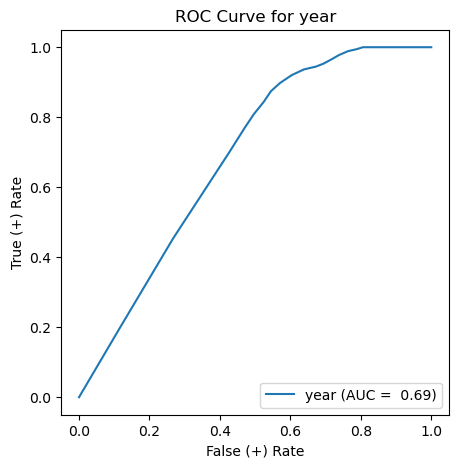

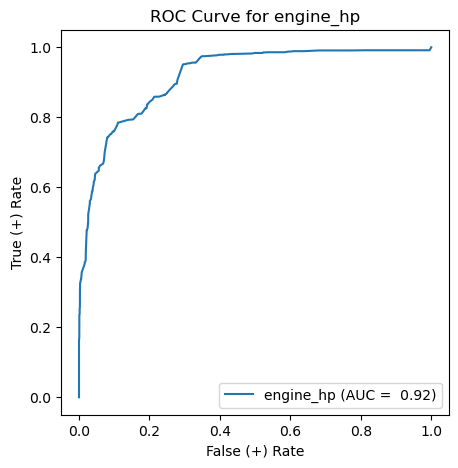

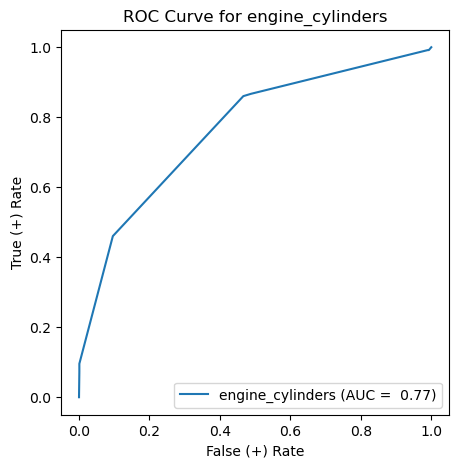

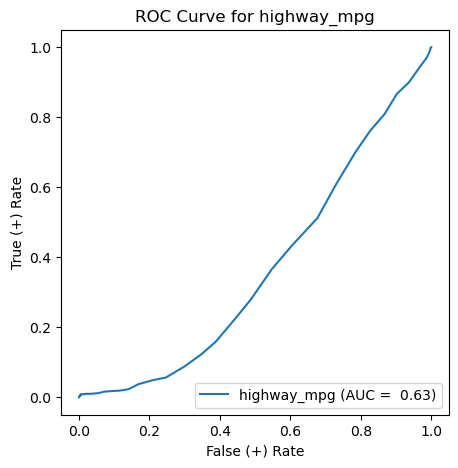

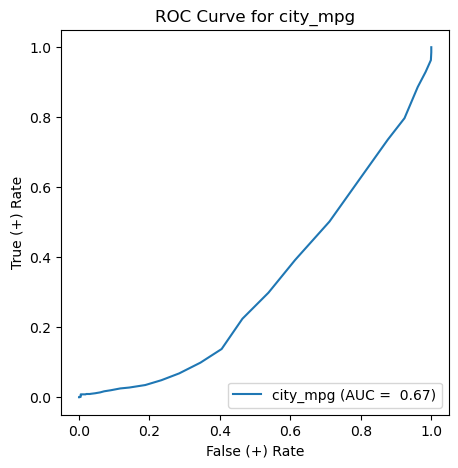

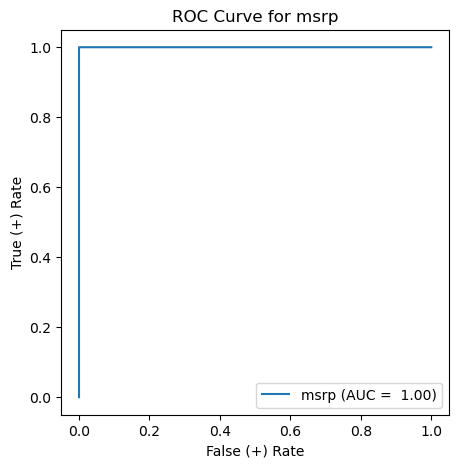

In [78]:
# Plotting the ROC curves
# Visualizing performance

for col in numerical_cols:
    fpr, tpr, threshold = roc_curve(y_train, data_train[col])
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label= f'{col} (AUC = {scores[col]: .2f})')
    plt.xlabel('False (+) Rate')
    plt.ylabel('True (+) Rate')
    plt.title(f'ROC Curve for {col}')
    plt.legend(loc='lower right')
    plt.show()

In [79]:
print('Q1 Answer: engine_hp')

Q1 Answer: engine_hp


## **`Q2 Training the model`**
Apply One-Hot Encoding using DictVectorizer and train the logistic  regression with these parameters:<br>
`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

In [99]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(data_train.to_dict(orient='records'))
X_val = dv.transform(data_val.to_dict(orient='records'))
X_test = dv.transform(data_test.to_dict(orient='records'))


model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

auc_score = roc_auc_score(y_val, y_pred)     #roc_auc_score(ytrue, yscore)

print(f' Q2 Answer: {auc_score: .3f}')

 Q2 Answer:  0.976


## **`Q3 Precision and Recall`**
* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

C:\Users\LXPH\anaconda3\envs\MachineLearning\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


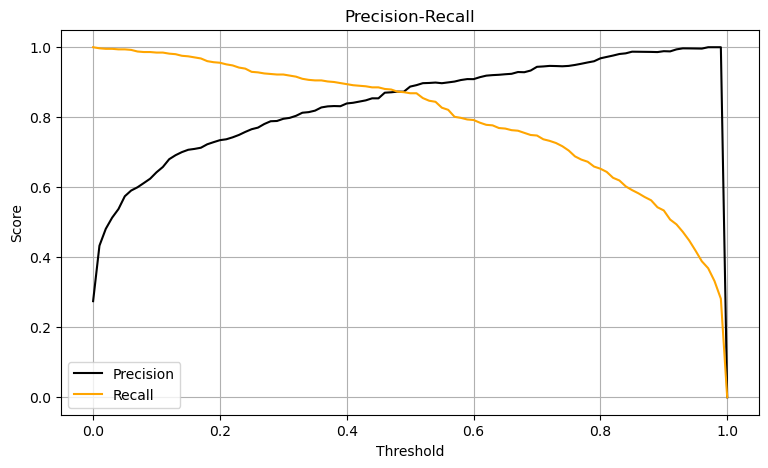

In [110]:
thresholds = np.arange(0, 1.01, 0.01)

precisions = []
recalls = []

for t in thresholds:
    y_val_pred = (y_val_prob >= t).astype(int)
    
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    
    precisions.append(precision)
    recalls.append(recall)
    
# Plotting Precision and Recall
plt.figure(figsize=(9,5))
plt.plot(thresholds, precisions, label='Precision', color='black')
plt.plot(thresholds, recalls, label='Recall', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall')
plt.grid(True)
plt.legend()
plt.show() 


In [112]:
print(f'Q3 Answer: 0.48')

Q3 Answer: 0.48


## **`Q4 F1 Score`**
Compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01.m <br>
Find at which threshold is F1 maximal. Th

In [114]:
from sklearn.metrics import f1_score
thresholds = np.arange(0, 1.01, 0.01)

f1s = {}
f1_manuals = {}

for t in thresholds:
    y_val_pred = (y_val_prob >= t).astype(int)
    
    f1 = f1_score(y_val, y_val_pred)
    f1s[t] = f1
    
    ## Manually
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    recall = (tp)/(tp+fn)
    precision = (tp)/(tp+fp)
    
    
    f1_m = 2*((precision*recall)/(precision+recall))
    f1_manuals[t] = f1_m
    
max_manual = max(f1_manuals, key=f1_manuals.get)
max_ = max(f1s, key=f1s.get)

print(max_, max_manual)

0.51 0.51


C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\3605591075.py:27: RuntimeWarning: invalid value encountered in scalar divide
  precision = (tp)/(tp+fp)


In [115]:
print('Q4 Answer: 0.51')

Q4 Answer: 0.51


## **`Q5-Fold CV`**
`KFold(n_splits=5, shuffle=True, random_state=1)KFold(n_splits=5, shuffle=True, random_state=1)`
* Iterate over different folds of df_full_train
* Split the data into train and validation
* Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation

Determine how large is the standard deviation of the scores across different folds.

In [143]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the number of splits and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize an empty list to store AUC scores for each fold
auc_scores = []

# Define the logistic regression model with the specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Iterate over different folds of data_full_train
for train_index, val_index in kf.split(data_full_train):
    # Split the data into train and validation sets for this fold
    data_train_fold = data_full_train.iloc[train_index]
    data_val_fold = data_full_train.iloc[val_index]

    # Separate the target variable from the features
    y_train_fold = data_train_fold.above_average.values
    y_val_fold = data_val_fold.above_average.values

    # Delete the target variable from the feature data
    del data_train_fold['above_average']
    del data_val_fold['above_average']

    # Apply one-hot encoding to the categorical features (if not already done)
    X_train_fold = vectorizer.transform(data_train_fold.to_dict(orient='records'))
    X_val_fold = vectorizer.transform(data_val_fold.to_dict(orient='records'))

    # Train the logistic regression model on the train data
    model.fit(X_train_fold, y_train_fold)

    # Predict probability scores on the validation data
    y_val_prob_fold = model.predict_proba(X_val_fold)[:, 1]

    # Calculate the ROC AUC score for this fold
    auc_score_fold = roc_auc_score(y_val_fold, y_val_prob_fold)

    # Append the AUC score to the list
    auc_scores.append(auc_score_fold)

# Calculate the standard deviation of AUC scores across different folds
std_deviation = np.std(auc_scores)

print(f"Standard Deviation of AUC Scores: {std_deviation}")
print(auc_scores)

Standard Deviation of AUC Scores: 2.933929986049027e-06
[0.9999917498556224, 0.9999986255882483, 0.9999986057665495, 0.9999999999999999, 0.9999986124986125]


In [147]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Define the number of splits and create a KFold object
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize an empty list to store AUC scores for each fold
auc_scores = []

# Define the logistic regression model with the specified parameters
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

# Iterate over different folds of data_full_train
for train_index, val_index in kf.split(data_full_train):
    # Split the data into train and validation sets for this fold
    data_train_fold = data_full_train.iloc[train_index]
    data_val_fold = data_full_train.iloc[val_index]

    # Separate the target variable from the features
    y_train_fold = data_train_fold.above_average.values
    y_val_fold = data_val_fold.above_average.values

    # Delete the target variable from the feature data
    data_train_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)
    data_val_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)

    vectorizer = DictVectorizer(sparse=False)
    # Apply one-hot encoding to the categorical features (if not already done)
    X_train_fold = vectorizer.fit_transform(data_train_fold.to_dict(orient='records'))
    X_val_fold = vectorizer.transform(data_val_fold.to_dict(orient='records'))

    # Train the logistic regression model on the train data
    model.fit(X_train_fold, y_train_fold)

    # Predict probability scores on the validation data
    y_val_prob_fold = model.predict_proba(X_val_fold)[:, 1]

    # Calculate the ROC AUC score for this fold
    auc_score_fold = roc_auc_score(y_val_fold, y_val_prob_fold)

    # Append the AUC score to the list
    auc_scores.append(auc_score_fold)

# Calculate the standard deviation of AUC scores across different folds
std_deviation = np.std(auc_scores)

print(f"Standard Deviation of AUC Scores: {std_deviation:.4f}")


C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1975560445.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)
C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1975560445.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)
C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1975560445.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

Standard Deviation of AUC Scores: 0.0033


In [148]:
print('Q5 Answer: 0.003')

Q5 Answer: 0.003


## **`Q6 HyperParameter Tuning`**
Now, use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 0.5, 10]
* Initialize KFold with the same parameters as previously
* Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Determine which C leads to the best  mean score.

In [149]:
# Define the values of C to iterate over
C_values = [0.01, 0.1, 0.5, 10]

# Initialize KFold with the same parameters as previously
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

# Initialize dictionaries to store mean and std scores for each C
mean_scores = {}
std_scores = {}

# Iterate over different C values
for C in C_values:
    # Initialize a list to store AUC scores for each fold
    auc_scores = []

    # Define the logistic regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

    # Iterate over different folds of data_full_train
    for train_index, val_index in kf.split(data_full_train):
        data_train_fold = data_full_train.iloc[train_index]
        data_val_fold = data_full_train.iloc[val_index]

        y_train_fold = data_train_fold.above_average.values
        y_val_fold = data_val_fold.above_average.values

        data_train_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)
        data_val_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)

        vectorizer = DictVectorizer(sparse=False)
        X_train_fold = vectorizer.fit_transform(data_train_fold.to_dict(orient='records'))
        X_val_fold = vectorizer.transform(data_val_fold.to_dict(orient='records'))

        model.fit(X_train_fold, y_train_fold)

        y_val_prob_fold = model.predict_proba(X_val_fold)[:, 1]

        auc_score_fold = roc_auc_score(y_val_fold, y_val_prob_fold)
        auc_scores.append(auc_score_fold)

    # Calculate mean and std of AUC scores for the current C
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)

    # Store the mean and std scores in the dictionaries
    mean_scores[C] = round(mean_auc, 3)
    std_scores[C] = round(std_auc, 3)

# Print the mean and std scores for each C value
for C in C_values:
    print(f"C={C}: Mean AUC = {mean_scores[C]}, Std AUC = {std_scores[C]}")

C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1835524177.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)
C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1835524177.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val_fold.drop(['above_average', 'msrp'], axis=1, inplace=True)
C:\Users\LXPH\AppData\Local\Temp\ipykernel_21072\1835524177.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

C=0.01: Mean AUC = 0.952, Std AUC = 0.003
C=0.1: Mean AUC = 0.972, Std AUC = 0.002
C=0.5: Mean AUC = 0.978, Std AUC = 0.001
C=10: Mean AUC = 0.981, Std AUC = 0.003


In [150]:
print('Q6 Answer: C=10')

Q6 Answer: C=10
